In [153]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
#import other useful libraries 




In this assignment, you will be using data from the real world (almost) to identify and predict the pattern in closing stock price of a company for each day in 2022. Load the dataset saved as **output.csv** in the github repo and do the following : 

a) Plot the acf and pacf graphs to identify the process and its order 
b) Use a linear regression model to find the coefficients of this process once you know the order 

**optional** : If you're unable to figure out the order in one go, play around with different lag values and check for the model that gives the best score. 
(use r2_score etc for this) 

**c) Create additional entries in the same dataframe which correspond to the first month of 2023 and then predict the closing stock price for each day of this month. Save your results in your github repo**



In [154]:
#load the dataset
url = 'https://raw.githubusercontent.com/gaurav15raj/Time_Series-Econs-/main/AR%20Processes/output.csv'
df = pd.read_csv(url)
df

,Unnamed: 0,Date,Prices
0,0,2022-01-01,99.346617
1,1,2022-01-02,99.563825
2,2,2022-01-03,100.163220
3,3,2022-01-04,99.841533
4,4,2022-01-05,101.927683
...,...,...,...
360,360,2022-12-27,100.584309
361,361,2022-12-28,100.727467
362,362,2022-12-29,100.187050
363,363,2022-12-30,97.957102


In [155]:
df['Date'] = pd.to_datetime(df.Date)
gg=df['Date']

In [156]:
#plot the acf and pacf 

df.set_index('Date', inplace=True)
df['Prices']=(df['Prices']-df['Prices'].mean())/df['Prices'].std()
df.drop(columns=('Unnamed: 0'),inplace=True)
df

,Prices
Date,
2022-01-01,-0.482230
2022-01-02,-0.327243
2022-01-03,0.100451
2022-01-04,-0.129087
2022-01-05,1.359470
...,...
2022-12-27,0.400915
2022-12-28,0.503065
2022-12-29,0.117454


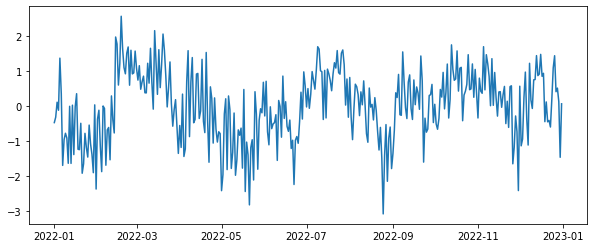

In [157]:
plt.figure(figsize=(10,4))
plt.plot(df)

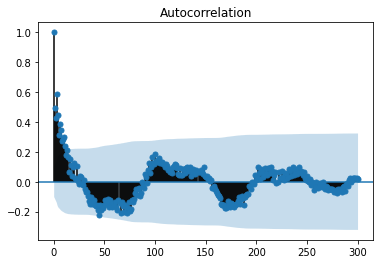

In [158]:
acf_plot = plot_acf(df,lags=300)

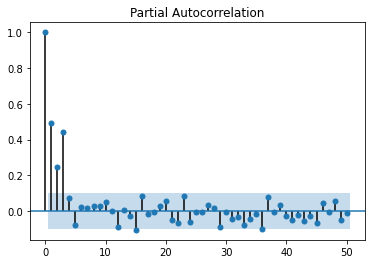

In [159]:
pacf_plot = plot_pacf(df,lags=50)

In [160]:
#it looks like an AR Process of order x, so we will train our regression till x lags 
#x=3
#use the df.shift function to get a lag of 1,2....x
df['Prices2']=df['Prices'].shift(-1, axis = 0)
df['Prices3']=df['Prices'].shift(-2, axis = 0)
df['Prices4']=df['Prices'].shift(-3, axis = 0)
df=df.dropna()
df

,Prices,Prices2,Prices3,Prices4
Date,,,,
2022-01-01,-0.482230,-0.327243,0.100451,-0.129087
2022-01-02,-0.327243,0.100451,-0.129087,1.359470
2022-01-03,0.100451,-0.129087,1.359470,0.341540
2022-01-04,-0.129087,1.359470,0.341540,-1.705199
2022-01-05,1.359470,0.341540,-1.705199,-0.971772
...,...,...,...,...
2022-12-24,0.186518,1.081561,1.429433,0.400915
2022-12-25,1.081561,1.429433,0.400915,0.503065
2022-12-26,1.429433,0.400915,0.503065,0.117454


In [161]:
x=df[['Prices2','Prices3','Prices4']]
y=df['Prices']

#perform data cleaning and define dependent and independent variables

In [162]:
#define train and test data 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2,random_state=64)

In [163]:
#define and fit your model
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(x_train,y_train)
lreg.score(x_test,y_test)

0.4761134725941901

In [164]:
#calculate the r2 score and comment on the model performance

There is a much simpler way of doing this via the statsmodel library instead of the sklearn library. Try doing the same here!

In [165]:
TEST_SET_SIZE = int(.2*(360))  # number of weeks left for the test set

data = df['Prices']
train_set, test_set = data[:-TEST_SET_SIZE], data[-TEST_SET_SIZE:]

print('shapes:', data.shape, train_set.shape, test_set.shape)

shapes: (362,) (290,) (72,)


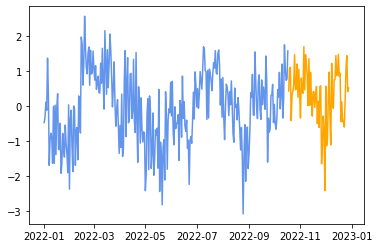

In [166]:
train_set_size = len(data) - TEST_SET_SIZE
train_set_dates = df.head(train_set_size).index  # for plotting
test_set_dates = df.tail(TEST_SET_SIZE).index  

plt.plot(train_set_dates, train_set, color='cornflowerblue', label='train data')
plt.plot(test_set_dates, test_set, color='orange', label='test data')
plt.show()

In [167]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(train_set, lags=100)  # use time span of 1 year for lagging
trained_model = model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [168]:
from sklearn.metrics import mean_squared_error as mse

predictions = trained_model.predict(start=train_set_size, 
                                    end=train_set_size + TEST_SET_SIZE - 1)

error = mse(test_set, predictions)

print(f'test MSE: {error:.3}')
print(f'test RMSE: {error ** 0.5:.3}')

test MSE: 1.04
test RMSE: 1.02


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


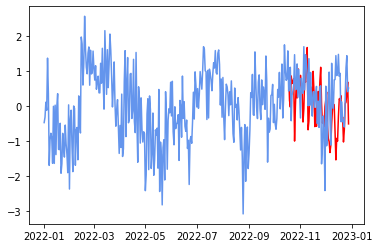

In [169]:
plt.plot(test_set_dates, predictions, color='red', label='predicted')
plt.plot(df.index, df.Prices, color='cornflowerblue', label='ground truth')
